
# Digital Signal Processing Final Assignment

#1. Compute DFT and IDFT of a Signal (Manual)

DFT of [1, 2, 3, 4]: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
Reconstructed signal from IDFT: [1. 2. 3. 4.]

2. Demonstrating DFT and IDFT on test signal:


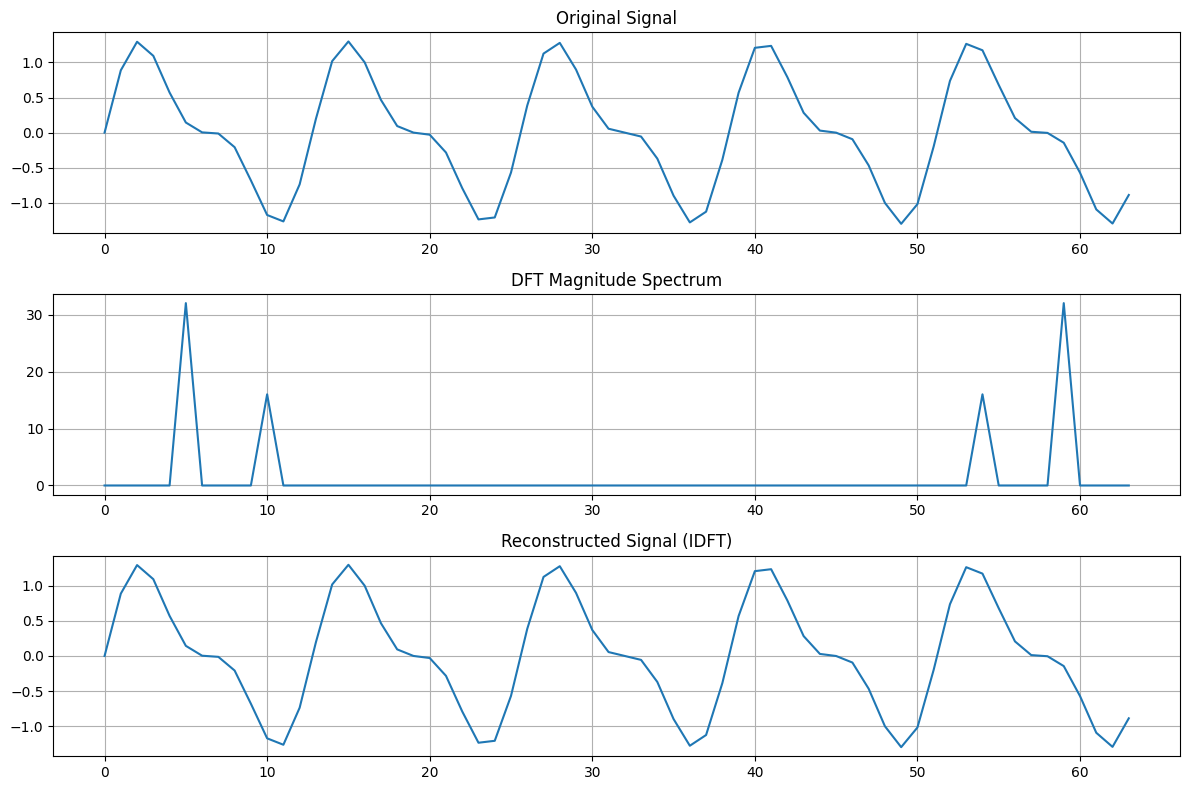

Maximum reconstruction error: 0.0000000000


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Manual DFT implementation
def compute_dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * pi * k * n / N)
    return X

# Manual IDFT implementation
def compute_idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * pi * k * n / N)
        x[n] /= N
    return x

# Function to generate test signal (sum of sinusoids)
def generate_test_signal(N):
    t = np.linspace(0, 1, N, endpoint=False)
    x = np.sin(2 * pi * 5 * t) + 0.5 * np.sin(2 * pi * 10 * t)
    return x

# Example usage with simple input
x_simple = np.array([1, 2, 3, 4])
X_simple = compute_dft(x_simple)
x_reconstructed_simple = compute_idft(X_simple)

print("DFT of [1, 2, 3, 4]:", X_simple)
print("Reconstructed signal from IDFT:", np.round(x_reconstructed_simple.real, 5))

# Demonstration with generated signal
print("\n2. Demonstrating DFT and IDFT on test signal:")

N = 64
test_signal = generate_test_signal(N)
X = compute_dft(test_signal)
reconstructed_signal = compute_idft(X)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(test_signal)
plt.title('Original Signal')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(np.abs(X))
plt.title('DFT Magnitude Spectrum')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(np.real(reconstructed_signal))
plt.title('Reconstructed Signal (IDFT)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Error verification
error = np.max(np.abs(test_signal - np.real(reconstructed_signal)))
print(f"Maximum reconstruction error: {error:.10f}")






# 2. Design a Low-pass and a High-pass Filter

<ipython-input-2-9e1de7130eab>:6: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, 1.0, np.sin(np.pi * x) / (np.pi * x))


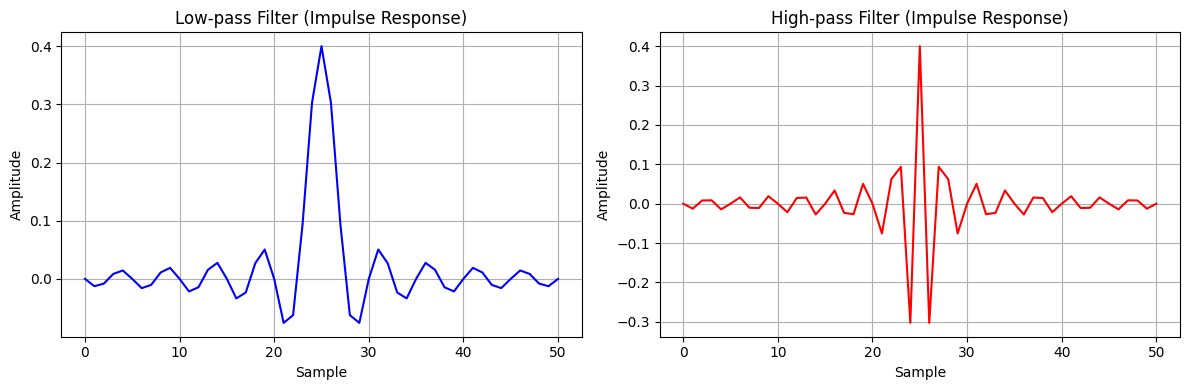

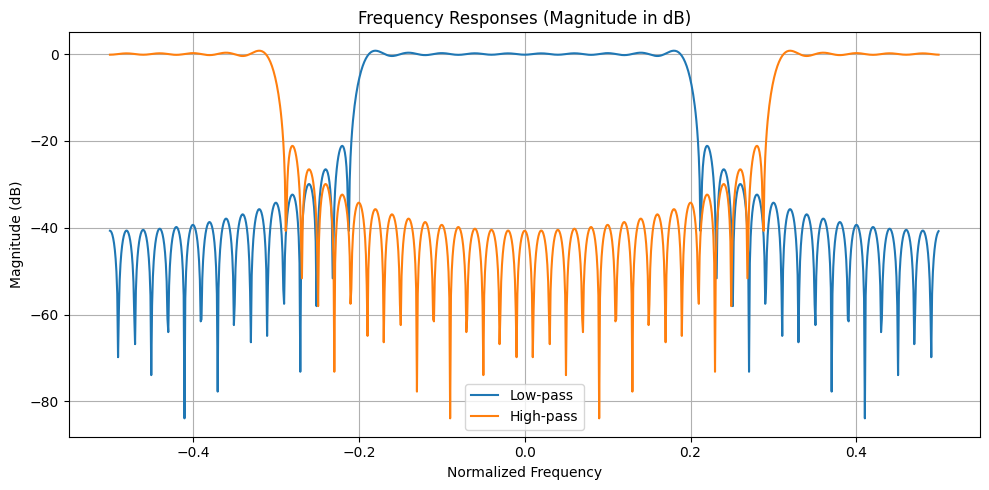

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def manual_sinc(x):
    return np.where(x == 0, 1.0, np.sin(np.pi * x) / (np.pi * x))


def low_pass(fc, N):
    n = np.arange(N)
    center = (N - 1) / 2
    h = 2 * fc * manual_sinc(2 * fc * (n - center))
    return h


def high_pass(fc, N):
    lp = low_pass(fc, N)
    hp = -lp
    hp[(N - 1) // 2] += 1
    return hp


N = 51
fc_lp = 0.2
fc_hp = 0.3


h_lp = low_pass(fc_lp, N)
h_hp = high_pass(fc_hp, N)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(h_lp, label="Low-pass", color='blue')
plt.title("Low-pass Filter (Impulse Response)")
plt.grid(True)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(h_hp, label="High-pass", color='red')
plt.title("High-pass Filter (Impulse Response)")
plt.grid(True)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


def plot_frequency_response(h, title):
    H = np.fft.fftshift(np.fft.fft(h, 1024))
    freq = np.linspace(-0.5, 0.5, len(H), endpoint=False)
    plt.plot(freq, 20 * np.log10(np.abs(H)), label=title)

plt.figure(figsize=(10, 5))
plot_frequency_response(h_lp, "Low-pass")
plot_frequency_response(h_hp, "High-pass")
plt.title("Frequency Responses (Magnitude in dB)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 3. Design a Rectangular and a Hamming Window

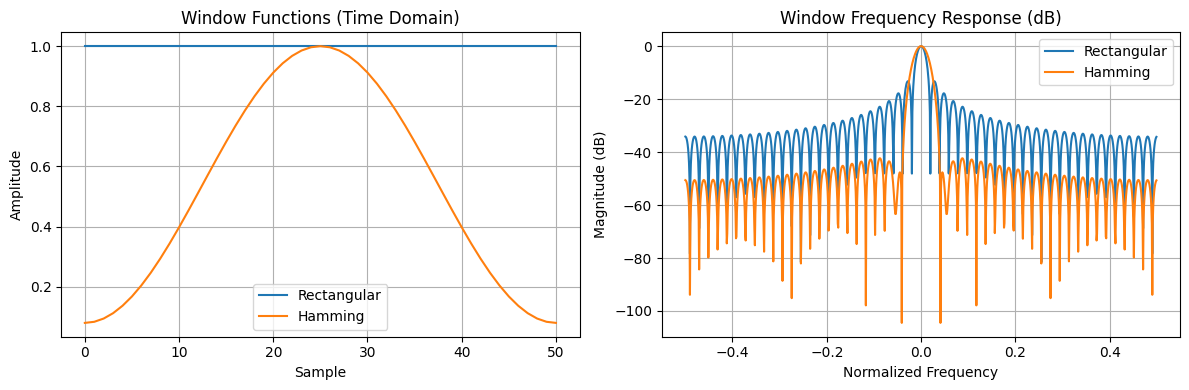

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 51


rect_window = np.ones(N)
hamming_window = np.hamming(N)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rect_window, label="Rectangular")
plt.plot(hamming_window, label="Hamming")
plt.title("Window Functions (Time Domain)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

def plot_window_response(window, label):
    w = np.fft.fftshift(np.fft.fft(window, 1024))
    w_db = 20 * np.log10(np.abs(w) / np.max(np.abs(w)))
    freq = np.linspace(-0.5, 0.5, len(w), endpoint=False)
    plt.plot(freq, w_db, label=label)


plt.subplot(1, 2, 2)
plot_window_response(rect_window, "Rectangular")
plot_window_response(hamming_window, "Hamming")
plt.title("Window Frequency Response (dB)")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#4. Compute the Z-transform of a Signal

4. Demonstrating Z-Transform:
Z-transform expression: X(z) = 0.25z^(2) + 0.5z^(1) + 1.0z^(0) + 0.5z^(-1) + 0.25z^(-2)



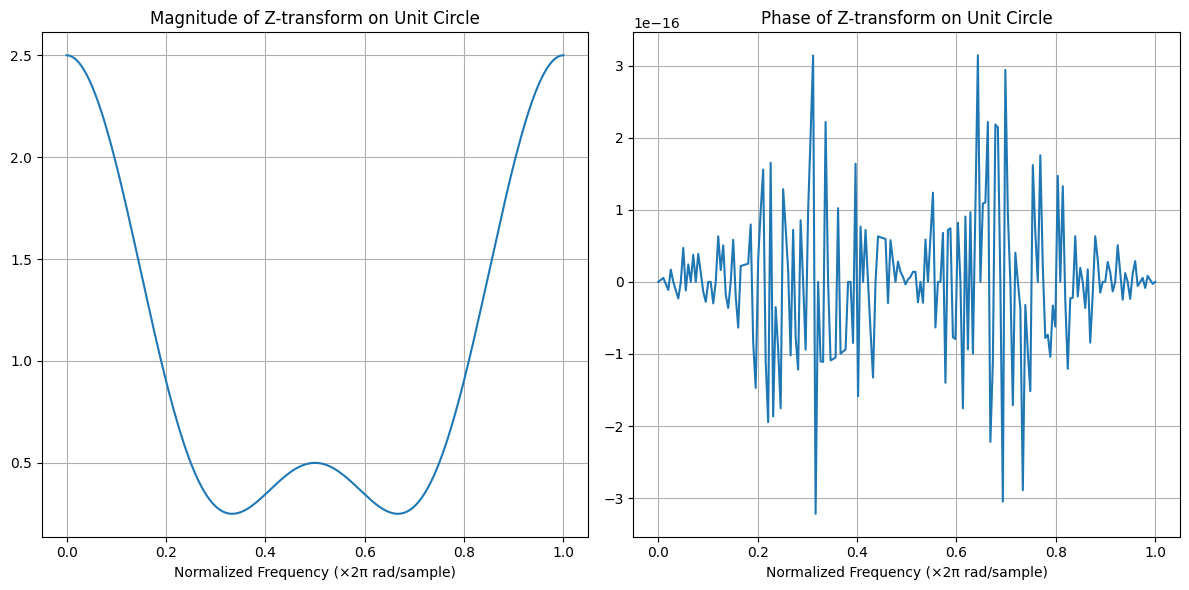

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def z_transform_coeffs(signal, index_range):
    coeffs = signal
    exponents = -index_range
    return coeffs, exponents

def evaluate_z_transform(coeffs, exponents, z_vals):
    output = np.zeros_like(z_vals, dtype=complex)
    for c, p in zip(coeffs, exponents):
        output += c * z_vals**p
    return output

print("4. Demonstrating Z-Transform:")

n_idx = np.arange(-2, 3)
x_vals = np.array([0.25, 0.5, 1, 0.5, 0.25])

c_vals, p_vals = z_transform_coeffs(x_vals, n_idx)

print("Z-transform expression: X(z) = ", end="")
for i, (c, p) in enumerate(zip(c_vals, p_vals)):
    if i > 0:
        print(" + ", end="")
    print(f"{c}z^({p})", end="")
print("\n")

theta_vals = np.linspace(0, 2 * np.pi, 200)
z_points = np.exp(1j * theta_vals)
X_evaluated = evaluate_z_transform(c_vals, p_vals, z_points)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(theta_vals / (2 * np.pi), np.abs(X_evaluated))
plt.title('Magnitude of Z-transform on Unit Circle')
plt.xlabel('Normalized Frequency (×2π rad/sample)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(theta_vals / (2 * np.pi), np.angle(X_evaluated))
plt.title('Phase of Z-transform on Unit Circle')
plt.xlabel('Normalized Frequency (×2π rad/sample)')
plt.grid(True)

plt.tight_layout()
plt.show()



# 5. Sample a Sinusoid at 500 Hz

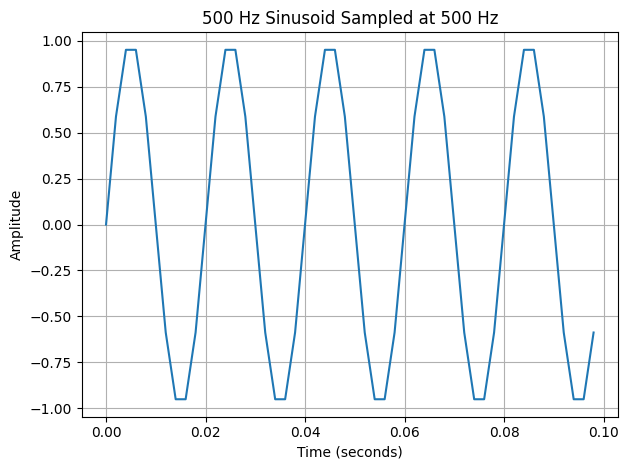

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


f_signal = 50
fs = 500
duration = 0.1
t = np.arange(0, duration, 1/fs)
x = np.sin(2 * np.pi * f_signal * t)
plt.plot(t,x)
plt.title(f"500 Hz Sinusoid Sampled at {fs} Hz")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. Compute FFT of a Signal (Manual)

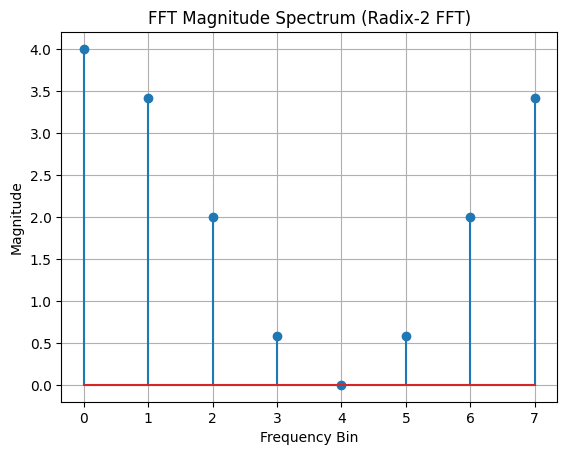

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fft_radix2(x):
    N = len(x)
    if N <= 1:
        return x
    if N & (N - 1) != 0:
        raise ValueError("Input length must be a power of 2 for radix-2 FFT")
    even = fft_radix2(x[::2])
    odd = fft_radix2(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return np.array([even[k] + T[k] for k in range(N // 2)] +
                    [even[k] - T[k] for k in range(N // 2)])

x = np.array([1, 2, 1, 0, 0, 0, 0, 0])
X = fft_radix2(x)

plt.stem(np.abs(X))
plt.title("FFT Magnitude Spectrum (Radix-2 FFT)")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


# 7. Design a Band-pass and a Band-stop Filter

<ipython-input-7-81c3e59f786a>:5: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, 1.0, np.sin(np.pi * x) / (np.pi * x))


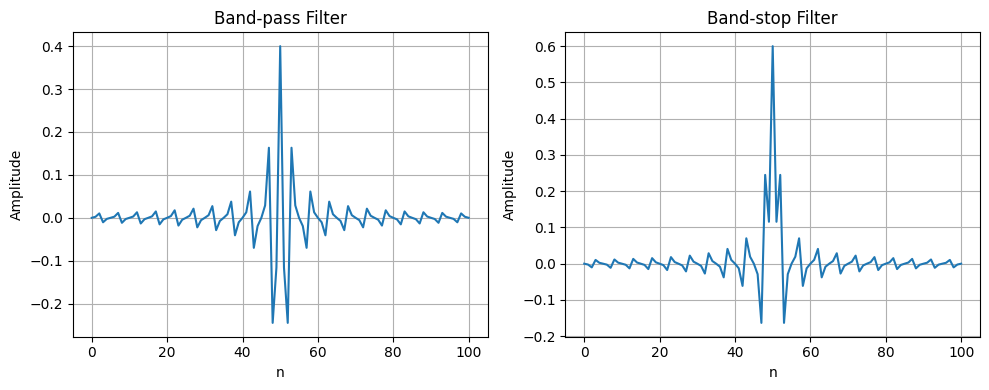

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def manual_sinc(x):
    return np.where(x == 0, 1.0, np.sin(np.pi * x) / (np.pi * x))

def band_pass(f1, f2, N):
    n = np.arange(N)
    center = (N - 1) / 2
    h1 = 2 * f2 * manual_sinc(2 * f2 * (n - center))
    h2 = 2 * f1 * manual_sinc(2 * f1 * (n - center))
    return h1 - h2

def band_stop(f1, f2, N):
    h_bp = band_pass(f1, f2, N)
    h_bs = -h_bp
    h_bs[(N - 1) // 2] += 1
    return h_bs

N = 101
f1, f2 = 0.2, 0.4
bp = band_pass(f1, f2, N)
bs = band_stop(f1, f2, N)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(bp)
plt.title("Band-pass Filter")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(bs)
plt.title("Band-stop Filter")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()
